In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **The data is split down by 12 months and includes hundreds of thousands of electronics store purchases.**
**The features are:**

Order ID: رقم بالطلب

Product: المنتج

Quantity Ordered:الكمية المطلوبة

Price Each: السعر

Order Date:  تاريخ الطلب

Purchase Address

# **Merge data from each month into one CSV**

In [2]:
import pandas as pd
import os
path='/content/drive/MyDrive/Projects/sales/dataset/'

files= [i for i in os.listdir(path)]
for j in files:
  print(j)

Sales_October_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_June_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv
Sales_December_2019.csv
Sales_May_2019.csv


In [6]:
all_data= pd.DataFrame()
for file in files:
  df= pd.read_csv(path+ file)
  all_data= pd.concat([all_data,df])
print(all_data.shape)
all_data.to_csv('/content/drive/MyDrive/Projects/sales/all_data',index=False)
all_data.head(5)

(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


# **Exploratory Data Analysis(EDA)**

In [12]:
#! pip install sweetviz
import sweetviz as sv
my_report = sv.analyze(all_data)


                                             |          | [  0%]   00:00 -> (? left)

1. very brief summary

*   The total number of rows
*   Number of duplicate rows.
*   The memory it occupies on RAM.
*   Total features(columns)
*   and how these are distributed (Numerical, categorical, text).

2. Associations:
Squares are categorical correlation in the data 
circles are the correlation between numerical data.
*** The color bar on the right shows the degree of relationship between the variablesز

*** we can see a list of tabs, each representing a feature of the dataset.

 


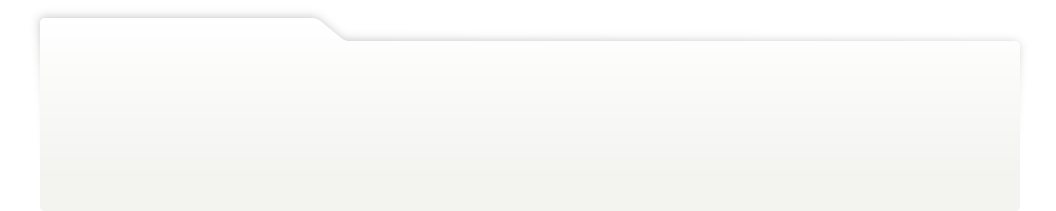
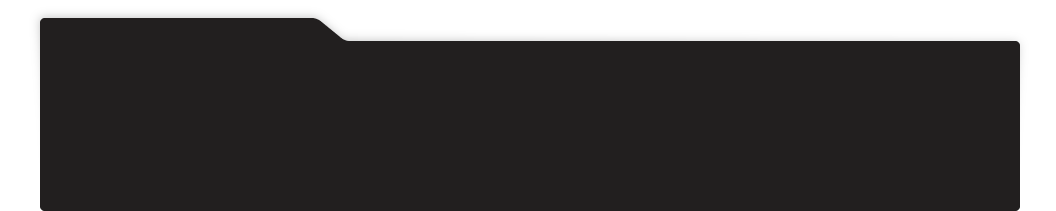
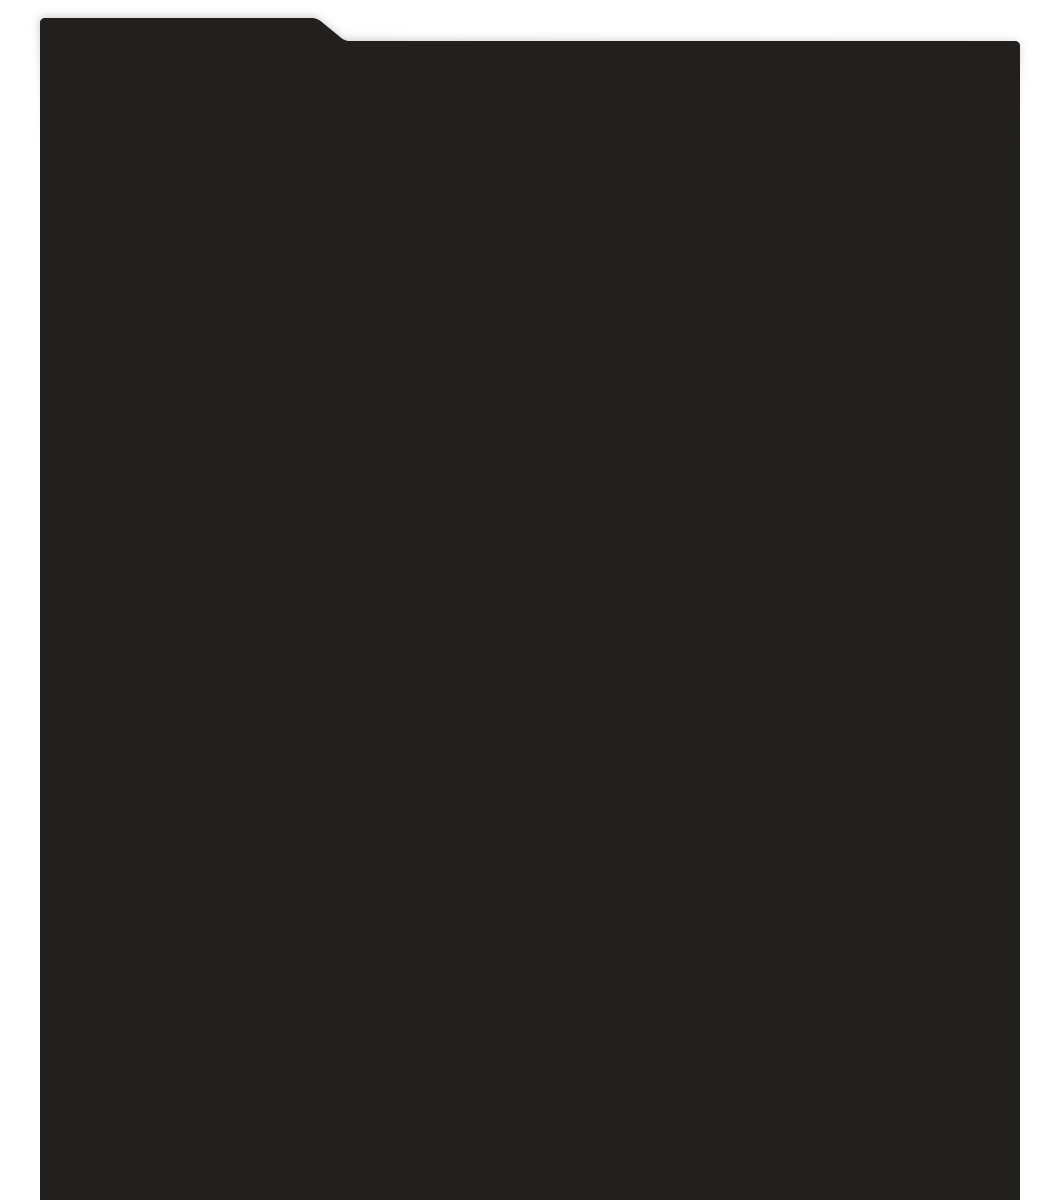
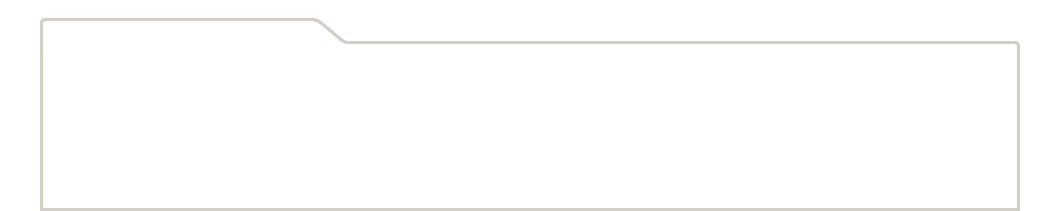
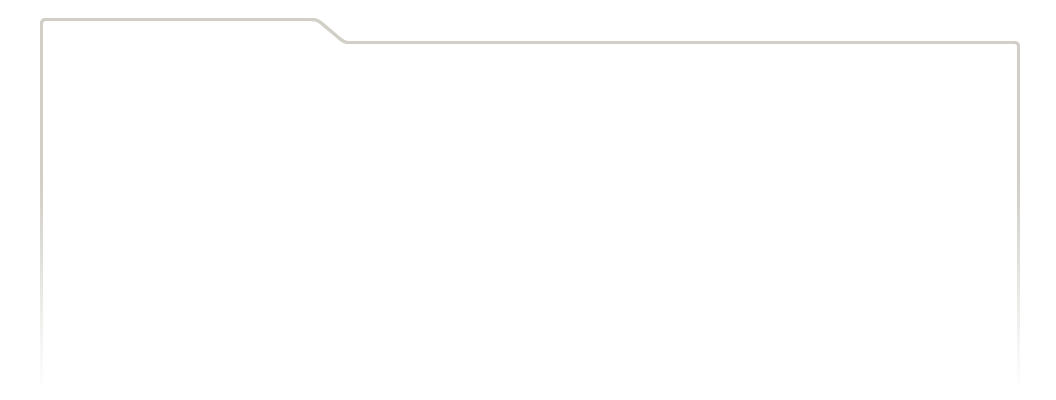
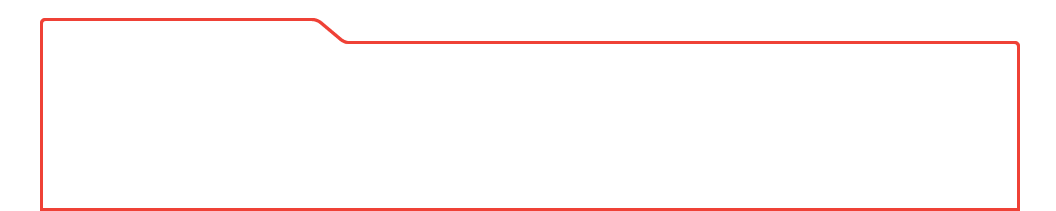
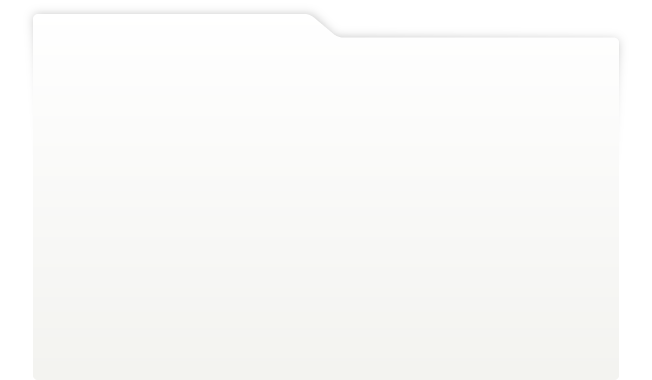
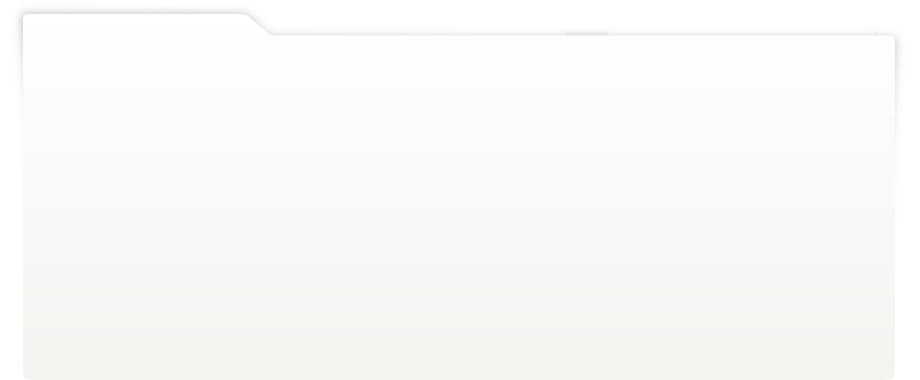
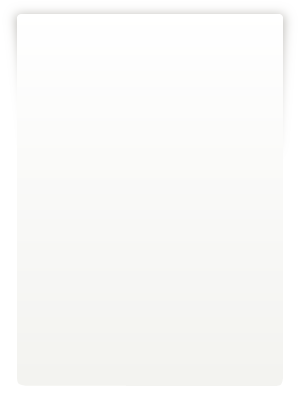
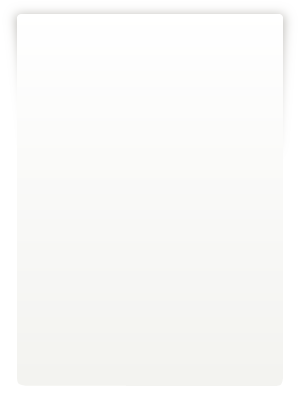
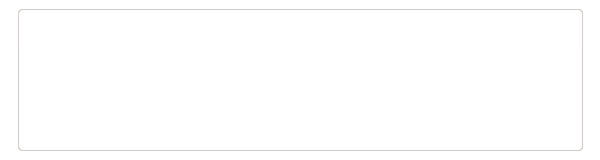
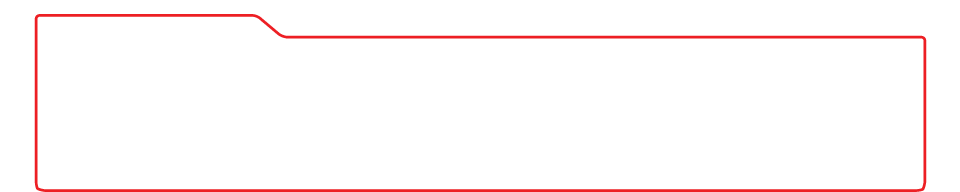
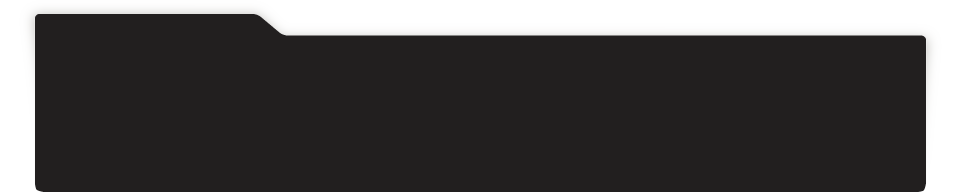
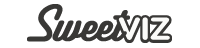
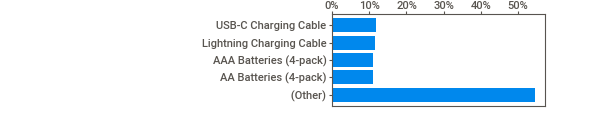
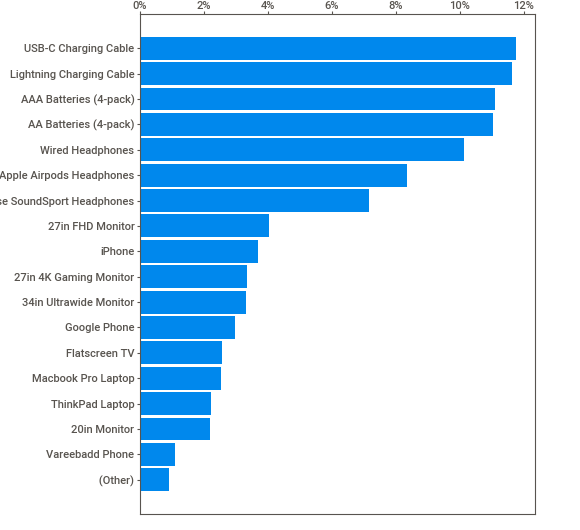
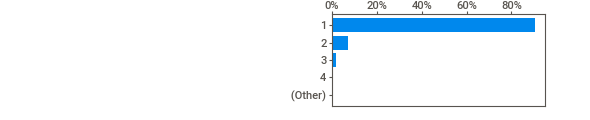
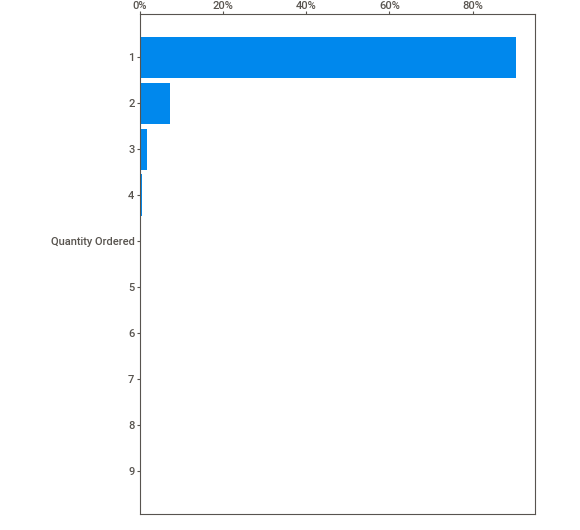
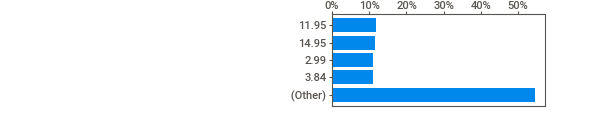
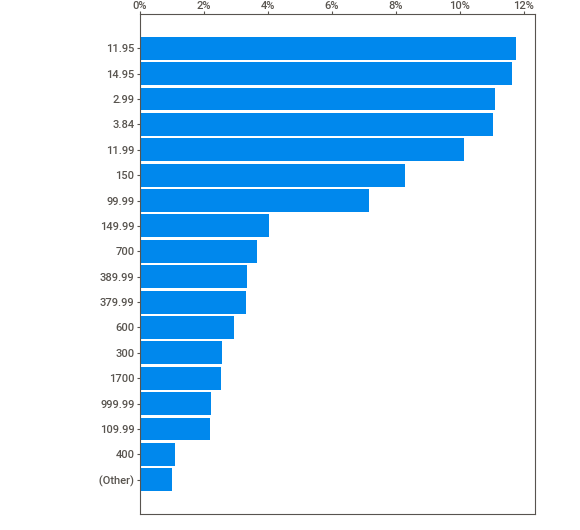
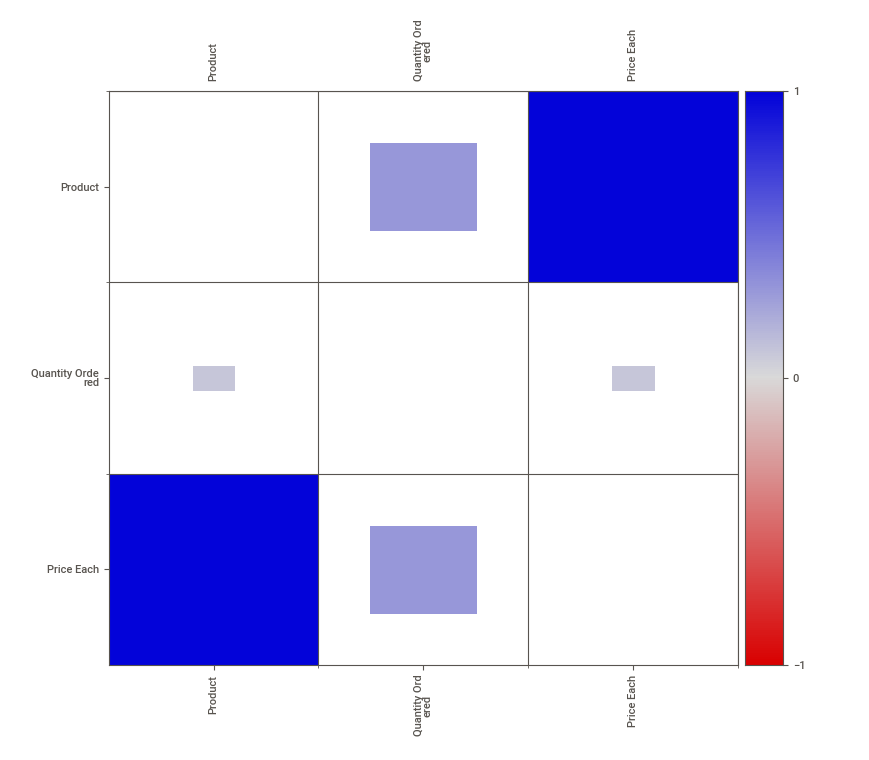
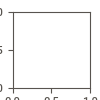

In [14]:
my_report.show_notebook()

# **Clean up the data!**
Based on the error, we decide how we should go about cleaning the data

In [15]:
 # Find NAN
missing= all_data.isnull().sum().sort_values(ascending= False)
print(missing)
nan_df = all_data[all_data.isnull().any(axis=1)]
nan_df

Purchase Address    545
Order Date          545
Price Each          545
Quantity Ordered    545
Product             545
Order ID            545
dtype: int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
16133,NaN,NaN,NaN,NaN,NaN,NaN
16175,NaN,NaN,NaN,NaN,NaN,NaN
16191,NaN,NaN,NaN,NaN,NaN,NaN
16379,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
all_data=all_data.dropna(how='all')


In [17]:
missing= all_data.isnull().sum().sort_values(ascending= False)
missing

Purchase Address    0
Order Date          0
Price Each          0
Quantity Ordered    0
Product             0
Order ID            0
dtype: int64

In [18]:
all_data[all_data['Order Date'].str[:]=='Order Date'].any(axis=1)

521      True
833      True
2180     True
2388     True
4248     True
         ... 
14291    True
15419    True
15963    True
16234    True
16505    True
Length: 355, dtype: bool

In [19]:
# Get rid of text in order date column
all_data= all_data[all_data['Order Date'].str[:]!='Order Date']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"


In [20]:
all_data.shape

(185950, 6)

In [21]:
all_data[all_data['Order Date'].str[:]=='Order Date'].any(axis=1)

Series([], dtype: bool)

In [22]:
# add month column
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10


# **What was the best month for sales?**

In [23]:
print(all_data['Quantity Ordered'].dtype)
print(all_data['Price Each'].dtype)
all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype('int32')
all_data['Price Each']= all_data['Price Each'].astype('float')
print(all_data['Quantity Ordered'].dtype)
print(all_data['Price Each'].dtype)

object
object
int32
float64


In [24]:
all_data['total_sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [26]:
df_sales= all_data.groupby('Month').sum()[['total_sales']]
df_sales

,total_sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


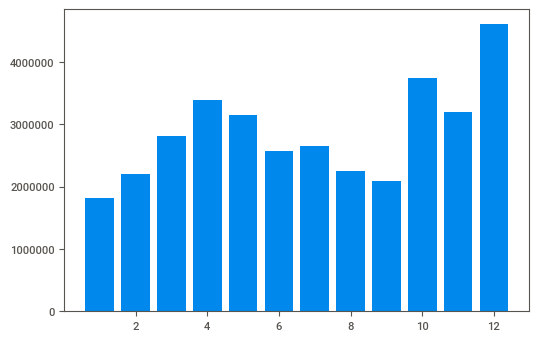

In [27]:
import matplotlib.pyplot as plt

x_axis= range(1,13)
plt.bar(x_axis,df_sales['total_sales'])
plt.show()

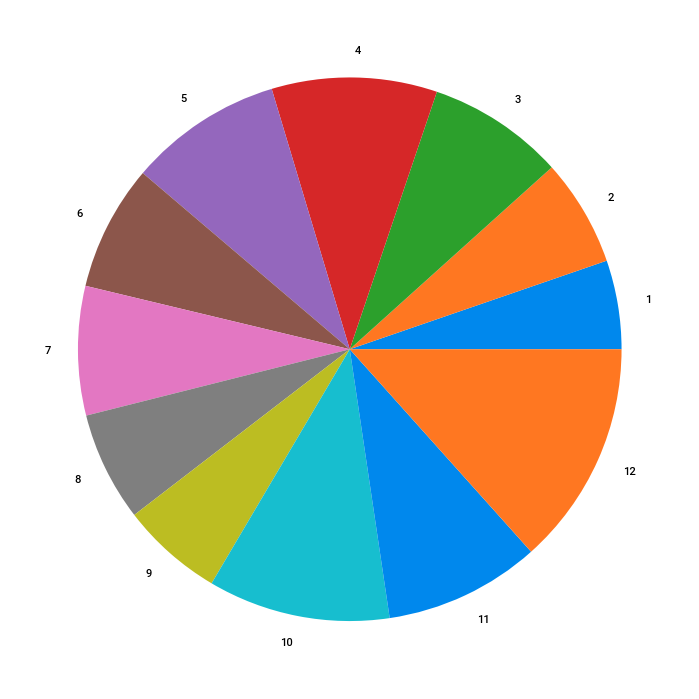

In [28]:
lable=['1','2','3','4','5','6','7','8','9','10','11','12']
plt.figure(figsize=(9,9))
plt.pie(df_sales['total_sales'], labels=lable)
plt.show()

# **What city had the highest sales**

In [29]:
# add city column
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles


In [30]:
city_high_sales= all_data.groupby('City').sum()
city_high_sales

,Quantity Ordered,Price Each,Month,total_sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


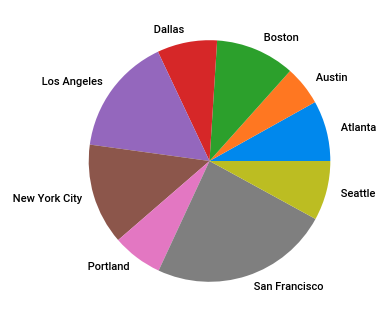

In [31]:
keys = [city for city, df in all_data.groupby(['City'])]
print(keys)
plt.pie(city_high_sales['total_sales'],labels=keys)
plt.show()

# **What time should we display advertisements to maximize likelihood of customer's buying product?**

In [32]:
# Add hour,minute columns
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City,Hour,Minute,Count
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas,10,56,1
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles,17,26,1
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City,17,20,1
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City,22,26,1
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles,16,10,1


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


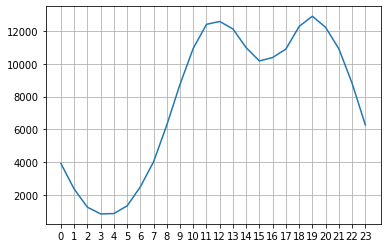

In [ ]:
hours = [h for h, df in all_data.groupby(['Hour'])]
print(hours)
plt.plot(hours, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.grid()
plt.show()